In [7]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

from collections import Counter

In [8]:
# Perform K-medoids clustering on basic2.csv
file1 = pd.read_csv('basic2.csv')
file2 = pd.read_csv('blob.csv')
file3 = pd.read_csv('boxes3.csv')
file4 = pd.read_csv('dart.csv')
file5 = pd.read_csv('outliers.csv')
file6 = pd.read_csv('spiral2.csv')

In [9]:
import numpy as np
import pandas as pd
from sklearn.metrics import pairwise_distances
import heapq

def similarity(c1, c2, dist_matrix):
    """Calculate the similarity between two clusters"""
    d = dist_matrix[np.ix_(c1, c2)]
    return np.sum(d) / (len(c1) * len(c2))

def similarity_matrix(clusters, dist_matrix):
    """Create a similarity matrix"""
    sim_matrix = np.zeros((len(clusters), len(clusters)))
    for i in range(len(clusters)):
        for j in range(i+1, len(clusters)):
            sim_matrix[i,j] = similarity(clusters[i], clusters[j], dist_matrix)
            sim_matrix[j,i] = sim_matrix[i,j]
    return sim_matrix

def merge_similar_clusters(clusters, sim_matrix, threshold):
    """Merge clusters that have similarity above the threshold"""
    max_similarity = -1
    max_c1 = None
    max_c2 = None
    for i in range(len(clusters)):
        for j in range(i+1, len(clusters)):
            if sim_matrix[i,j] > max_similarity:
                max_similarity = sim_matrix[i,j]
                max_c1, max_c2 = i, j
    if max_similarity >= threshold:
        clusters[max_c1] += clusters[max_c2]
        del clusters[max_c2]
        return True
    else:
        return False

def split_cluster(c, k, dist_matrix):
    """Split a cluster into k subclusters using k-medoids"""
    n_points = len(c)
    medoids_idx = np.random.choice(range(n_points), k, replace=False)
    medoids = c[medoids_idx]
    labels = np.zeros(n_points)
    for i in range(n_points):
        d = dist_matrix[c[i], medoids]
        labels[i] = np.argmin(d)
    subclusters = [[] for i in range(k)]
    for i in range(n_points):
        subclusters[int(labels[i])].append(c[i])
    return subclusters

def chameleon_clustering(df, k, merge_threshold):
    """Perform Chameleon clustering"""
    X = df.values
    dist_matrix = pairwise_distances(X)
    n = X.shape[0]
    # Create initial clusters, each containing a single data point
    clusters = [[i] for i in range(n)]
    while len(clusters) > k:
        sim_matrix = similarity_matrix(clusters, dist_matrix)
        # Merge the two most similar clusters
        while merge_similar_clusters(clusters, sim_matrix, merge_threshold):
            sim_matrix = similarity_matrix(clusters, dist_matrix)
        # Split the largest cluster into k subclusters
        largest_cluster = max(clusters, key=len)
        subclusters = split_cluster(largest_cluster, k, dist_matrix)
        del clusters[clusters.index(largest_cluster)]
        for subcluster in subclusters:
            clusters.append(subcluster)
    # Assign a cluster label to each data point
    labels = np.zeros(n, dtype=int)
    for i in range(len(clusters)):
        for j in clusters[i]:
            labels[j] = i
    return labels


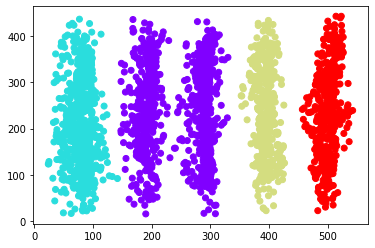

In [10]:
labels1 = chameleon_clustering(file1, 3, 0.5)
print(labels1)

#visualize
plt.scatter(file1['x'], file1['y'], c=labels1)
plt.show()


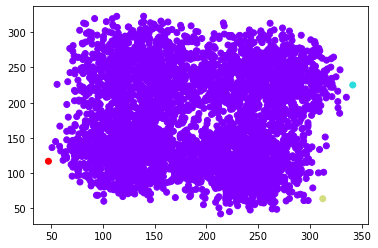

In [11]:
labels1 = chameleon_clustering(file2, 3, 0.5)
print(labels1)

#visualize
plt.scatter(file2['x'], file2['y'], c=labels1)
plt.show()


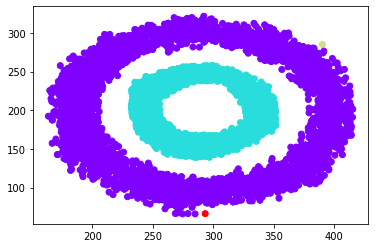

In [12]:
labels1 = chameleon_clustering(file4, 3, 0.5)
print(labels1)

#visualize
plt.scatter(file4['x'], file4['y'], c=labels1)
plt.show()

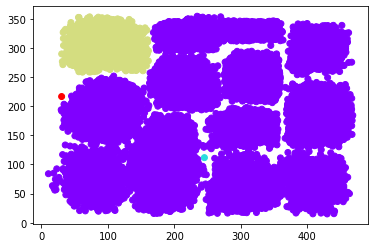

In [13]:
labels1 = chameleon_clustering(file3, 3, 0.5)
print(labels1)

#visualize
plt.scatter(file3['x'], file3['y'], c=labels1)
plt.show()

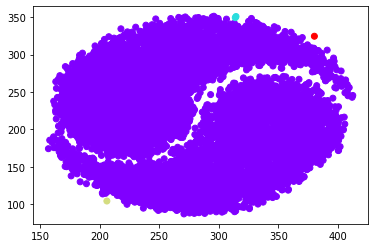

In [14]:
labels1 = chameleon_clustering(file6, 3, 0.5)
print(labels1)

#visualize
plt.scatter(file6['x'], file6['y'], c=labels1)
plt.show()